# Convolutional Autoencoder with MNIST

- fashion_mnist dataset 을 이용한 deep autoencoder 생성

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, UpSampling2D, MaxPooling2D
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

In [2]:
(X_train, _), (X_test, _) = fashion_mnist.load_data()
X_train.shape

4422102/4422102 [==============================] - 1s 0us/step


(60000, 28, 28)

In [3]:
X_train = X_train / 255.           
X_test = X_test / 255.

X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

# Convolutional autoencoder

<img src="https://i.imgur.com/DfVioS3.png" width="75%" height="75%"/>

In [4]:
input = Input(shape=(28, 28, 1))
# Encoder
conv_1 = Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(input)
maxpool_1 = MaxPooling2D(pool_size=(2,2))(conv_1)

conv_2 = Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(maxpool_1)
maxpool_2 = MaxPooling2D(pool_size=(2,2))(conv_2)

bottle_neck = Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same')(maxpool_2)

# Decoder
conv_3 = Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(bottle_neck)
upsample_3 = UpSampling2D(size=(2,2))(conv_3)

conv_4 = Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(upsample_3)
upsample_4 = UpSampling2D(size=(2,2))(conv_4)

conv_5 = Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same')(upsample_4)

In [5]:
# autoencoder model
autoencoder = Model(inputs=input, outputs=conv_5)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 256)         295168

In [6]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

In [7]:
# encoder model for visualization
encoder_viz = Conv2D(filters=1, kernel_size=(3,3), activation='relu', padding='same')(bottle_neck)
encoder_model = Model(inputs=input, outputs=encoder_viz)

In [8]:
encoder_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 256)         2951

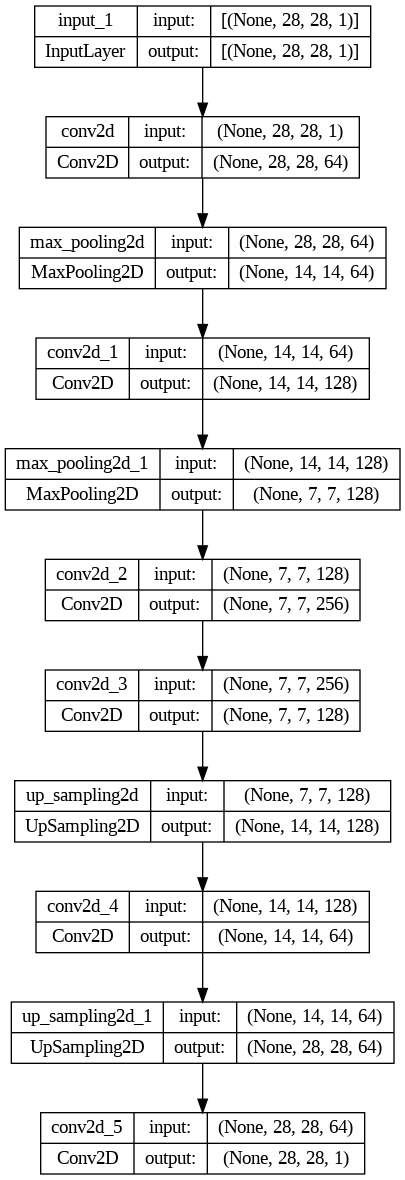

In [9]:
plot_model(autoencoder, show_shapes=True)

In [10]:
history = autoencoder.fit(X_train, X_train, epochs=50, shuffle=True, 
                          batch_size=256, validation_data=(X_test, X_test))

Epoch 1/50
235/235 [==============================] - 20s 30ms/step - loss: 0.2997 - val_loss: 0.2723
Epoch 2/50
235/235 [==============================] - 6s 27ms/step - loss: 0.2674 - val_loss: 0.2655
Epoch 3/50
235/235 [==============================] - 6s 27ms/step - loss: 0.2618 - val_loss: 0.2624
Epoch 4/50
235/235 [==============================] - 6s 27ms/step - loss: 0.2580 - val_loss: 0.2581
Epoch 5/50
235/235 [==============================] - 6s 27ms/step - loss: 0.2555 - val_loss: 0.2565
Epoch 6/50
235/235 [==============================] - 6s 27ms/step - loss: 0.2538 - val_loss: 0.2560
Epoch 7/50
235/235 [==============================] - 6s 27ms/step - loss: 0.2525 - val_loss: 0.2546
Epoch 8/50
235/235 [==============================] - 6s 27ms/step - loss: 0.2516 - val_loss: 0.2539
Epoch 9/50
235/235 [==============================] - 6s 27ms/step - loss: 0.2509 - val_loss: 0.2523
Epoch 10/50
235/235 [==============================] - 6s 27ms/step - loss: 0.2502 - val_l

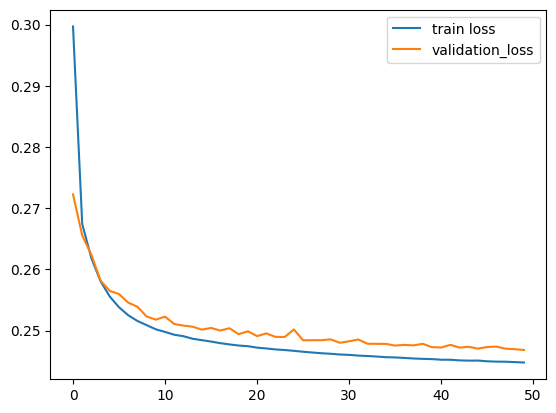

In [11]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.legend()

1/1 [==============================] - 0s 19ms/step


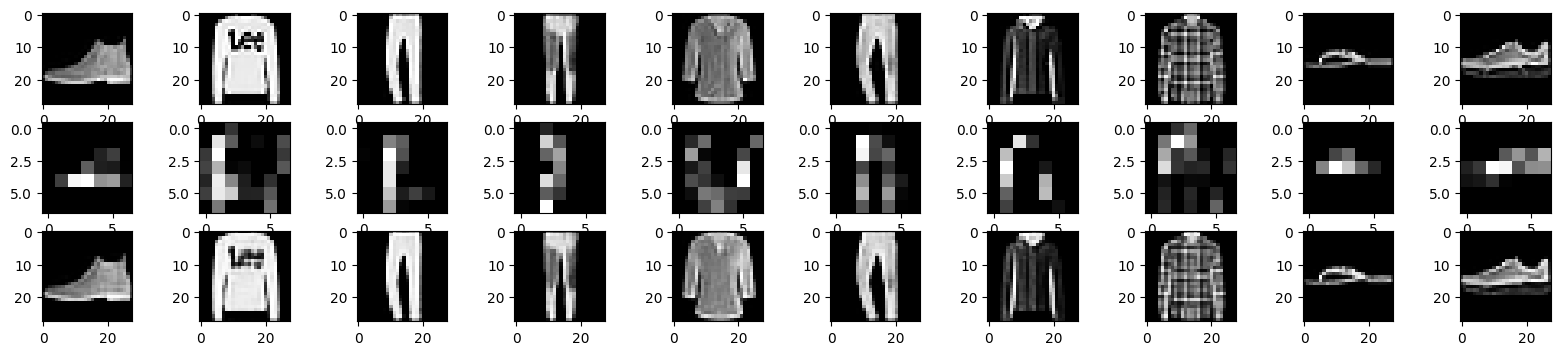

In [12]:
fig, ax = plt.subplots(3, 10, figsize=(20, 4))

for i in range(10):
    ax[0, i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    img = np.expand_dims(X_test[i], axis=0)
    ax[1, i].imshow(encoder_model.predict(img).reshape(7, 7), cmap='gray')
    ax[2, i].imshow(autoencoder.predict(img).reshape(28, 28), cmap='gray')